## **Final Project: Data Analysis Using Linear Regression**

### **Course**: MATH 230

### Name: Donovan Dunning



###  Expectations

This project has the following expectations:
- Ability to ask research questions and building a research framework to identify potential solutions.
- Ability to import and implement various python modules.
- Loading and inspecting data to get basic information.
- Data Exploration and visualization.
- Cleaning the data and handling the missing values (if any).
- Feature selections, data filtering, and data preprocessing.
- Creating tidy data for feeding to learning algorithms.
- Input preprations and transformation.
- Building, training, and testing regression models.

### Guidelines

For your final report (Due December 15th on Bridges), you will prepare a 15-20
minutes presentation talking about an interesting data analysis that you did in Python and
the software configuration management of your project on GitHub. You may work in groups
of two (or three). The presentations will be done during the class time on December 12th.
1. You should select a dataset for your analysis that is of interest to you.
2. Formulate a research hypothesis you want to answer with this dataset.
3. Describe the variables in the dataset that relate to your hypothesis.
4. Formulate a statistical hypothesis based on the available data.
5. Conduct a descriptive statistical analysis for relevant variables in the dataset using
graphical figures.

## Project Components


### Background/Information:


Covid-19, also identified as the Corona Virus, was a pandemic that struck the world starting in 2020. The data set that has been used for this project invloves the use of information collected from the pandemic initially, at the end of year 2020. THe data includes confirmed infection cases per country and region. The usefulness of the gather data allows the use for better analysis to determine what areas were most greatly affected by the pandemic. Some points that could be taken away is the percentage of infection rates to death rates in relation to diffrent countries.

### Introduction / Methology


Using this data set we will be able to predict the possible outcome for the progression of covid in the future. I will be using linear regression as a form of analysis. With this regression model I will build an self evaluating system to make accurate predictions of what the suspected death outcome will be to infection rate. Using multiple libraries I can visualize this data in plots allowing for the end reader to better understand the output of this data set. When beginning this project I needed to parse through the data and decide what sectors I wanted to manipulate and run tests through first. Once deciding this I were able to pre process and parse through the needed data sets. Witht the data parsed I wanted to apply multiple different approches in order to understand the differences between the methods.

### Getting Data, Cleaning, and  Preprocessing. 


In [42]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


col_names = ['Country/Region, Confirmed, Deaths','Recovered','Active','New cases','New deaths','New recovered',
             'Deaths / 100 Cases','Recovered / 100 Cases','Deaths / 100 Recovered',
             'Confirmed last week','1 week change','1 week % increase','WHO Region',]


#data_path = "/content/drive/MyDrive/Project1_Group1/data.csv"

data = pd.read_csv('covid_19_data.csv')

#data.set_index('date', inplace=True)

data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [5]:
print(data.head(10))

print(data.info())

print(data.describe().transpose())

        Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0          Afghanistan      36263    1269      25198    9796        106   
1              Albania       4880     144       2745    1991        117   
2              Algeria      27973    1163      18837    7973        616   
3              Andorra        907      52        803      52         10   
4               Angola        950      41        242     667         18   
5  Antigua and Barbuda         86       3         65      18          4   
6            Argentina     167416    3059      72575   91782       4890   
7              Armenia      37390     711      26665   10014         73   
8            Australia      15303     167       9311    5825        368   
9              Austria      20558     713      18246    1599         86   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10             18                3.50                  69.49   
1           6           

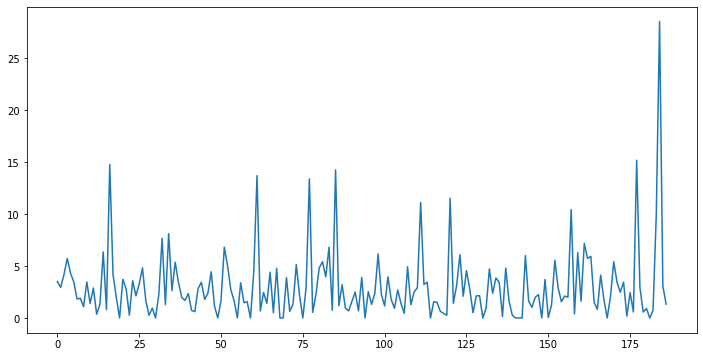

In [9]:
data['Deaths / 100 Cases'].plot(figsize=(12,6))
plt.show()

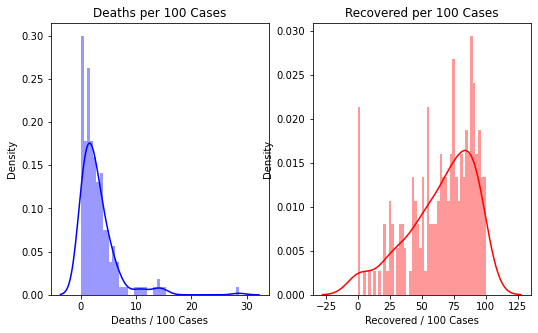

In [11]:
plt.figure(figsize = (18,5))

plt.subplot(141)
sns.distplot(data['Deaths / 100 Cases'].dropna(), bins=50, color='b')
plt.title("Deaths per 100 Cases")

plt.subplot(142)
sns.distplot(data['Recovered / 100 Cases'].dropna(), bins=50, color='r')
plt.title("Recovered per 100 Cases")

#plt.subplot(143)
#sns.distplot(data['Deaths / 100 Recovered'].dropna(), bins=50, color='y')
#plt.title("Deaths per 100 Recovered")

plt.show()

In [30]:
data = data.rename(columns={'Country/Region': 'Country', 'WHO Region': 'Region','1 week % increase': 'Increase', '1 week change': 'week', 'Recovered / 100 Cases' : 'Recovered / 100 Cases'})

In [14]:
data.Region.value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: Region, dtype: int64

<AxesSubplot:>

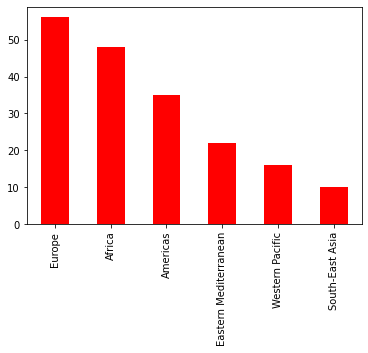

In [41]:
data.Region.value_counts().plot(kind = 'bar',color='r')

In [17]:
Total = data.groupby("Region")["Deaths"].sum()
Total

Region
Africa                    12223
Americas                 342732
Eastern Mediterranean     38339
Europe                   211144
South-East Asia           41349
Western Pacific            8249
Name: Deaths, dtype: int64

In [51]:
data = data.rename(columns={'Country/Region': 'Country', 'WHO Region': 'Region','1 week % increase': 'Increase', '1 week change': 'week', 'Recovered / 100 Cases' : 'Recovered_100'})

In [52]:
covid = data.drop(['Active','New cases','New recovered','Confirmed last week','New deaths','Deaths / 100 Recovered'], axis =1)
covid.head()

,Country,Confirmed,Deaths,Recovered,Deaths / 100 Cases,Recovered_100,week,Increase,Region
0,Afghanistan,36263,1269,25198,3.50,69.49,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,2.95,56.25,709,17.00,Europe
2,Algeria,27973,1163,18837,4.16,67.34,4282,18.07,Africa
3,Andorra,907,52,803,5.73,88.53,23,2.60,Europe
4,Angola,950,41,242,4.32,25.47,201,26.84,Africa


In [46]:
col_names2 = ['Country','Confirmed','Deaths','Recovered','Deaths / 100 Cases','Recovered / 100 Cases','Increase','Region']

In [53]:
correlation = covid.corr()

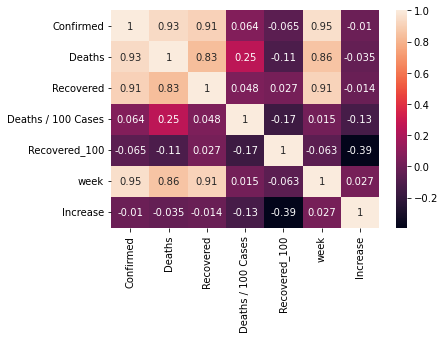

In [54]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns
           ,annot = True)
plt.savefig("heatmap.png")

In [73]:
confirmed = covid.drop(['Country','Recovered','Deaths / 100 Cases','Recovered_100','week','Increase','Region'], axis =1)

In [74]:
confirmed

,Confirmed,Deaths
0,36263,1269
1,4880,144
2,27973,1163
3,907,52
4,950,41
...,...,...
182,10621,78
183,10,1
184,1691,483
185,4552,140


<AxesSubplot:xlabel='Deaths', ylabel='Confirmed'>

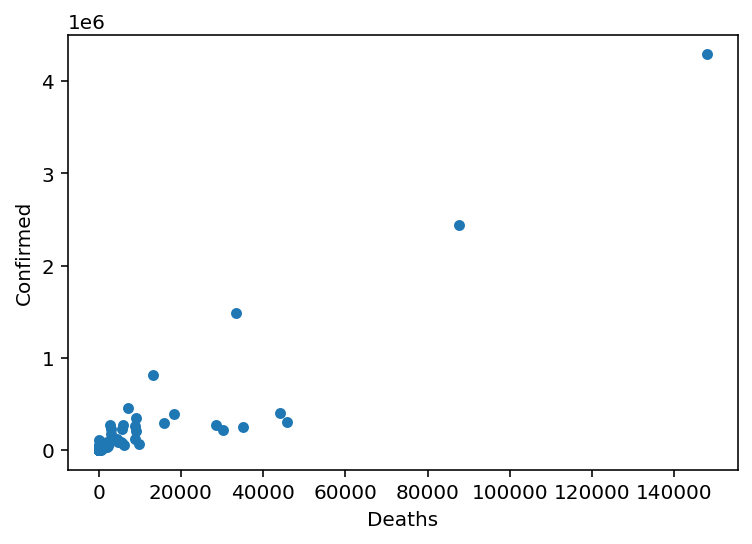

In [78]:
confirmed.plot(x='Deaths',y='Confirmed',kind='scatter')

In [89]:
X= confirmed['Confirmed']

X.head()

0    36263
1     4880
2    27973
3      907
4      950
Name: Confirmed, dtype: int64

In [90]:
y = confirmed['Deaths']
y.head()

0    1269
1     144
2    1163
3      52
4      41
Name: Deaths, dtype: int64

### Modeling Approach ( Regression Models)


CALCULATE SCORES METHODS

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(130,)
(130,)
(57,)
(57,)


In [93]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [94]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(130, 1)
(130,)
(57, 1)
(57,)


In [95]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = lr.predict(X_test)

Text(0, 0.5, 'Deaths')

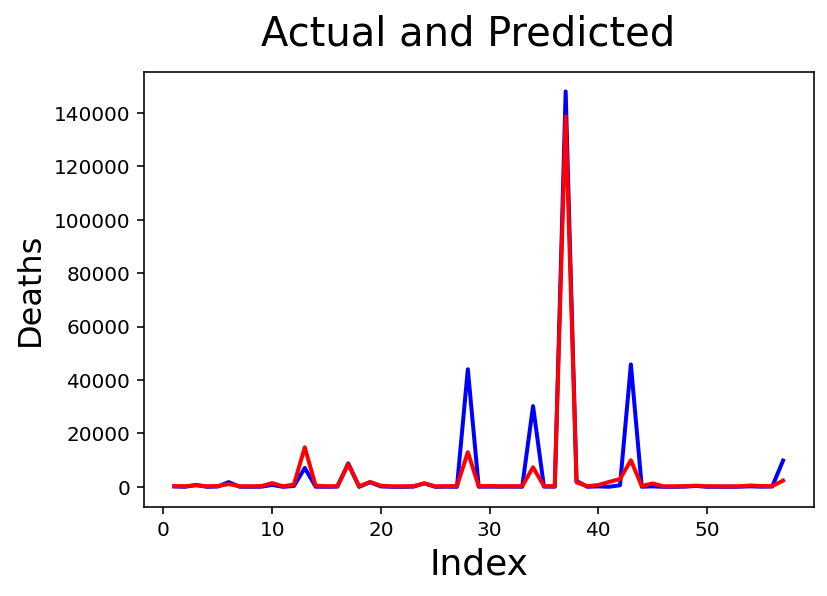

In [99]:
import matplotlib.pyplot as plt
c = [i for i in range(1,58,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Deaths', fontsize=16) 

Blue: Test   Red: Predicted

### Experimental Results and Discussion

The regression model which was Linear regression, is a good model to use however there are other models that exist. By importing this regression model, we are able to create a set of predicted values to compare and scale amongst true values. There were many differernt forms of analysis done to gather different types of information. Some of the analysis that was done throughout the project was measuring the deaths per 100 cases against the recovered. In the model that had a histogram including the regions of the countires in the data set showed the most affected areas. The visualizations for the regression models are shown above. One thing that I encountered in the experimental process was attempting to form and fit my data to produce the best results for Linear Regression. Although in the end I was bale to come out with a product I most likely would have chosen a different data set that would have been more applicable for linear regression. The way that the data was formatted also presented a problem. However, besides the problems that presented themselves I was able to gather sufficient results. With the Linear Regression results it shows how the predicted values (red), were closely able to resemble the testing values(blue), meaning the model made an acurate prediction.

### Conclusion 

By using the tools of regression throughout the project we were able to take this particular data set of the covid-19 infection results by comparing the deaths to the confirmed rates. The data received from the creation of the regression modes was in the end a way to make a system that can effectively make predictions on future casuality results from covid-19. The results from the project could later then be used to inform people of precautions that may have been taken. Then through the use of plots and visualization, it gave a better perspective of what it was that we were attempting to get out of the project, which gave the reader a better understanding of the project and what was being researched.


### Future Observations
In the future, if I were to do a similar project, I would look into data where using linear regression wold produce a better result for analysis. One area that interests me is the use of linear regression for stock market prediction, i feel as thoguh it would have resulted in a more stream line approach and there for more concise results. 

Math/Computer Science department, Math355/COMSC415 course, and RWU.